
# Project: Investigate a (No Show Appointments Data Analysis) Dataset

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> This dataset collects information from 100k medical appointments in Brazil and is focused on the question of whether or not patients show up for their appointment. A number of characteristics about the patient are included in each row.

## Research questions:

 - **‘Question 1’** What is the factor effect on no_show cases ?
 - **‘Question 2’** Which neighborhoods have the highest number of no-shows?
 - **‘Question 3’** Are there more No Shows on some days of the week??
 >

In [55]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.
import pandas as pd
import numpy as py
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt 

%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

### General Properties

In [21]:
# Load your data and print out a few lines. Perform operations to inspect data
df=pd.read_csv('noshowappointments-kagglev2-may-2016.csv')
#   types and look for instances of missing or possibly errant data.
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [9]:
df.shape

(110527, 14)

In [10]:
df.duplicated().sum()

0

In [15]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [17]:
df.isnull().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64



### Data Cleaning 

 >After discussing the structure of the data and any problems that need to be
 cleaned, perform those cleaning steps in the second part of this section.


In [22]:
##Drop the column That nott related to my analysis .

df.drop(['PatientId', 'AppointmentID', ], axis=1, inplace=True)
df.head()

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [23]:
# convert the date format for each ScheduledDay & AppointmentDay
df.loc[:, ['ScheduledDay', 'AppointmentDay']] = df.loc[:, ['ScheduledDay', 'AppointmentDay']].apply(pd.to_datetime)
df.head()

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [46]:
##check the minimum and maximum value of age
df['Age'].describe()

count    110527.000000
mean         37.088874
std          23.110205
min          -1.000000
25%          18.000000
50%          37.000000
75%          55.000000
max         115.000000
Name: Age, dtype: float64

In [47]:
## remove the odd value(-1) it might be a newborn or something else .
df.loc[df['Age'] == -1]

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
99832,F,2016-06-06 08:58:13+00:00,2016-06-06 00:00:00+00:00,-1,ROMÃO,0,0,0,0,0,0,No


In [48]:
## remove the odd value(-1) it might be a newborn or something else .
df.drop([99832],inplace=True)

In [49]:
df['Age'].describe()

count    110526.000000
mean         37.089219
std          23.110026
min           0.000000
25%          18.000000
50%          37.000000
75%          55.000000
max         115.000000
Name: Age, dtype: float64

In [50]:
# Replace No With (Attend) and Yes With (Absent) to make dataset understanding
df['No-show'].replace({'No': 'Attend', 'Yes': 'Absent'}, inplace = True)

In [52]:
df['No-show'].value_counts()

Attend    88207
Absent    22319
Name: No-show, dtype: int64

In [53]:
df.head()

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,Attend
1,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,Attend
2,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,0,0,0,Attend
3,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,0,0,0,0,0,0,Attend
4,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,1,1,0,0,0,Attend


In [59]:
# Create a two new columns of  extracting day of the week for { Appointment Day of week as: appointment_dow} 
# and {Schedule Day of week as: schedule_dow}

df['schedule_dow'] = df['ScheduledDay'].dt.day_name()
df['appointment_dow'] = df['AppointmentDay'].dt.day_name()
df.head()

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,schedule_dow,appointment_dow
0,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,Attend,Friday,Friday
1,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,Attend,Friday,Friday
2,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,0,0,0,Attend,Friday,Friday
3,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,0,0,0,0,0,0,Attend,Friday,Friday
4,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,1,1,0,0,0,Attend,Friday,Friday


In [60]:
# save the new clean and tidy dataset as csv file
df.to_csv('noshowappointments_clean.csv', index = False)

<a id='eda'></a>
## Exploratory Data Analysis



### Overall visualization & Analysis

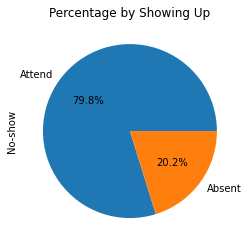

In [62]:
# Explorer the overall view of of no_show data in pie chart
df['No-show'].value_counts().plot(kind='pie', title = 'Percentage by Showing Up', autopct='%1.1f%%');

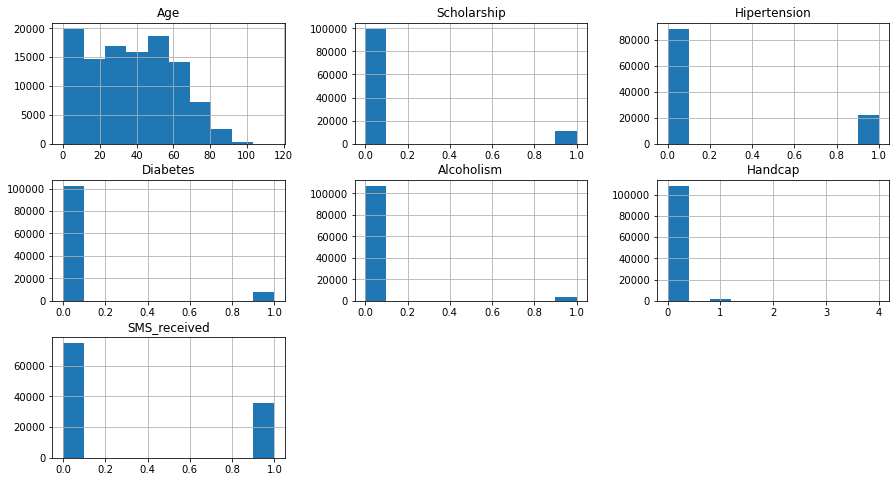

In [63]:
#figure out the distribution of data
df.hist(figsize=(15, 8));

### Research Question 1:What is the factor effect on no_show cases ? 

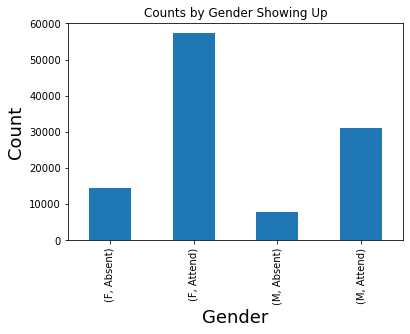

In [73]:
#The gender factor and its effects .
df.groupby(['Gender', 'No-show']).count()['Age'].plot(kind='bar', title = 'Counts by Gender Showing Up')
plt.xlabel('Gender', fontsize=18)
plt.ylabel('Count', fontsize=18);

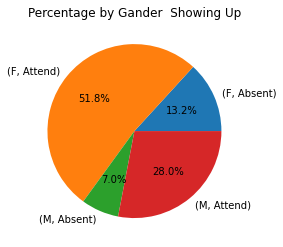

In [74]:
df.groupby(['Gender', 'No-show']).count()['Age'].plot(kind='pie', title = 'Percentage by Gander  Showing Up', autopct='%1.1f%%')
plt.ylabel('');

In [81]:
df['Gender'].value_counts()

F    71839
M    38687
Name: Gender, dtype: int64

> we clearly see that the females are more attends at the appointment than maleز
- We have a large amount of female patients, assuming the context that women tend to care more about their health than man due to the massive difference from the consultants as we can see here.

- But woman and men have a similar no-showing proportion.

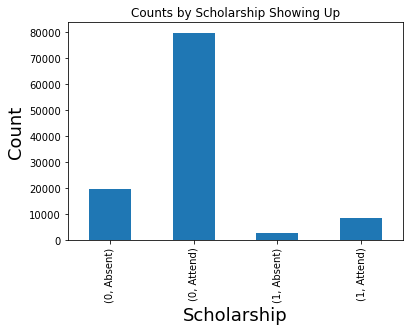

In [75]:
#The Scholarship factor and its effects .
df.groupby(['Scholarship', 'No-show']).count()['Age'].plot(kind='bar', title = 'Counts by Scholarship Showing Up')
plt.xlabel('Scholarship', fontsize=18)
plt.ylabel('Count', fontsize=18);

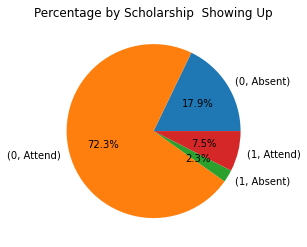

In [76]:
df.groupby(['Scholarship', 'No-show']).count()['Age'].plot(kind='pie', title = 'Percentage by Scholarship  Showing Up', autopct='%1.1f%%')
plt.ylabel('');

In [79]:
df['Scholarship'].value_counts()

0    99665
1    10861
Name: Scholarship, dtype: int64

>the value of patients who haven't scholarship attend more than who have.

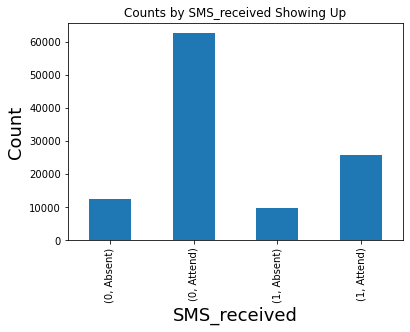

In [82]:
#The SMS_received factor and its effects .
df.groupby(['SMS_received', 'No-show']).count()['Age'].plot(kind='bar', title = 'Counts by SMS_received Showing Up')
plt.xlabel('Scholarship', fontsize=18)
plt.ylabel('Count', fontsize=18);

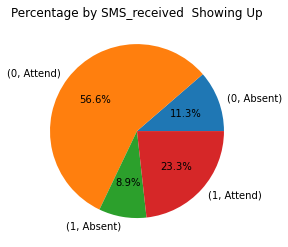

In [84]:
df.groupby(['SMS_received', 'No-show']).count()['Age'].plot(kind='pie', title = 'Percentage by SMS_received  Showing Up', autopct='%1.1f%%')
plt.ylabel('');

In [85]:
df['SMS_received'].value_counts()

0    75044
1    35482
Name: SMS_received, dtype: int64

>Surprisingly, the group who received a SMS-reminder did not show up more often compared to those who did not receive a reminder. The group not having received a reminder has a much smaller proportion of No-shows.

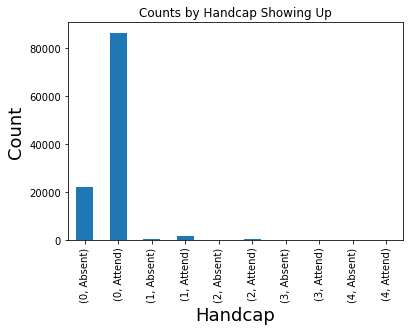

In [86]:
#The Handcap factor and its effects .
df.groupby(['Handcap', 'No-show']).count()['Age'].plot(kind='bar', title = 'Counts by Handcap Showing Up')
plt.xlabel('Handcap', fontsize=18)
plt.ylabel('Count', fontsize=18);

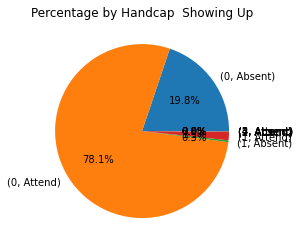

In [178]:
df.groupby(['Handcap', 'No-show']).count()['Age'].plot(kind='pie', title = 'Percentage by Handcap  Showing Up', autopct='%1.1f%%')
plt.ylabel('');

>The no handcap patpatient is attend more than the other withe 78.1%

### Research Question 2 :Which neighborhoods have the highest number of no-shows?

In [146]:
#Top 10 Showes by Neighbourhood
shows_by_hood = df.loc[df['No-show']=='Attend']
shows_by_hood = shows_by_hood.groupby("Neighbourhood")["No-show"].count().reset_index(name="count").sort_values("count", ascending=False)
shows_by_hood=shows_by_hood[:10]
shows_by_hood.head(10)

,Neighbourhood,count
37,JARDIM CAMBURI,6252
42,MARIA ORTIZ,4586
58,RESISTÊNCIA,3525
38,JARDIM DA PENHA,3246
65,SANTA MARTHA,2635
10,CENTRO,2631
35,ITARARÉ,2591
77,TABUAZEIRO,2559
68,SANTO ANTÔNIO,2262
8,BONFIM,2223


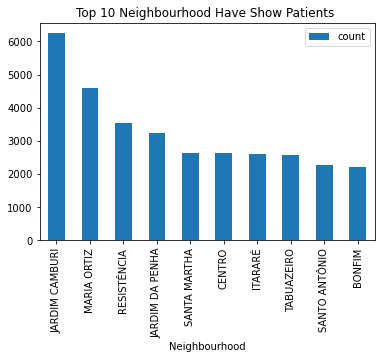

In [147]:
shows_by_hood.plot(x='Neighbourhood',kind='bar', title = 'Top 10 Neighbourhood Have Show Patients ');

In [149]:
#Top 10 no-Showes by Neighbourhood
#Top 10 Showes by Neighbourhood
noshows_by_hood = df.loc[df['No-show']=='Absent']
noshows_by_hood = noshows_by_hood.groupby("Neighbourhood")["No-show"].count().reset_index(name="count").sort_values("count", ascending=False)
noshows_by_hood=shows_by_hood[:10]
noshows_by_hood.head(10)

,Neighbourhood,count
37,JARDIM CAMBURI,6252
42,MARIA ORTIZ,4586
58,RESISTÊNCIA,3525
38,JARDIM DA PENHA,3246
65,SANTA MARTHA,2635
10,CENTRO,2631
35,ITARARÉ,2591
77,TABUAZEIRO,2559
68,SANTO ANTÔNIO,2262
8,BONFIM,2223


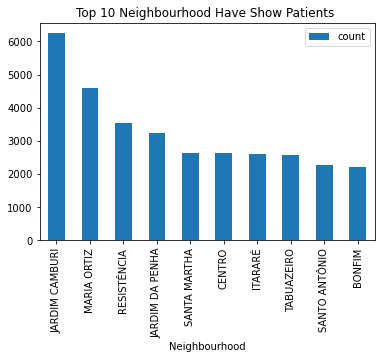

In [153]:
noshows_by_hood.plot(x='Neighbourhood',kind='bar', title = 'Top 10 Neighbourhood Have Show Patients ');

> We can see that Jardim Camburi is the one with most of the appointments in the state , We have a small rate difference for each local. 

### Research Question 3:Are there more No Shows on some days of the week?

In [176]:
nwt=df.groupby("appointment_dow")["No-show"].count().reset_index(name="count").sort_values("count", ascending=False)
nwt.head()

,appointment_dow,count
5,Wednesday,25867
4,Tuesday,25640
1,Monday,22714
0,Friday,19019
3,Thursday,17247


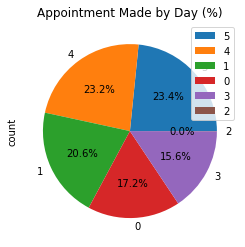

In [177]:
nwt.plot(x='appointment_dow',y='count',kind='pie', title = 'Appointment Made by Day (%)', autopct='%1.1f%%');

>Wednesday was the day with highest total amount of appointment made which is 25867 (23.4%)& The lowest is Thursday.

In [168]:
# the number of  no shows for each day of the week.
nw=df.loc[df['No-show']=='Absent']
nw=nw.groupby("appointment_dow")["No-show"].count().reset_index(name="count").sort_values("count", ascending=False)
nw.head()

,appointment_dow,count
4,Tuesday,5152
5,Wednesday,5093
1,Monday,4690
0,Friday,4037
3,Thursday,3338


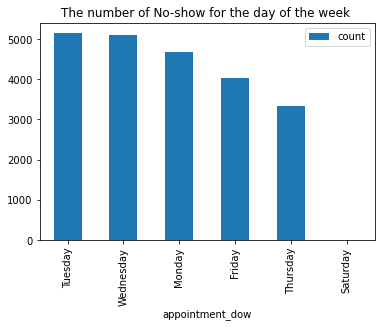

In [169]:
nw.plot(x='appointment_dow',kind='bar', title = 'The number of No-show for the day of the week ');

>The most day which has no show appointment is Tuesday & the lowest is Thursday .

<a id='conclusions'></a>
## Conclusions

> Based on the variables we have, what is the most relevant factor that is influencing the patient to no showing the medical appointment
- There isn't a clear conclusin here, we actually see a lot of interesting insights analysing
- we clearly see that the females are more attends at the appointment than male
- the value of patients who haven't scholarship attend more than who have.
- The no handcap patpatient is attend more than the other withe 78.1%
- there is a very subtle decrease of the no-showing rate for patients that attend on Thursdays
- Wednesday was the most popular day for people to attend their appointment

### Limitations:
- Some informations about the columns of the dataset was outdated, for example, the handicap is documented as "True/False" variable but in the dataset it represents the amount of disabilites of the patients.

- limitation of this analysis was the lack of background information. In the initial analysis of the data it was found that only 32% of the appointments had SMS messages received. It is possible that patients were more likely to be encouraged to enroll in SMS notifications after they have already missed an appointment. That would mean that those who were receiving SMSes were also more likely to have problems making appointments.

- Patients with repeat no-shows would be a good cohort to remove from the analysis to understand environmental or health factors influencing no-shows. This was not done but could improve the integrity of the investigation.